In [ ]:
pip install seaborn
Testing

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 


def load_happiness_data(path = '/Users/sandy/Documents/IUB_Grad_School/Semesters/Fall_2023/AML/Assignments/Assignment_1/'):
    csv_path = os.path.join(path, "happiness_data.csv")
    return pd.read_csv(csv_path)

In [3]:
happiness = load_happiness_data()
happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
happiness.drop('year', axis=1, inplace=True)

In [5]:
happiness.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   Life Ladder                       1949 non-null   float64
 2   Log GDP per capita                1913 non-null   float64
 3   Social support                    1936 non-null   float64
 4   Healthy life expectancy at birth  1894 non-null   float64
 5   Freedom to make life choices      1917 non-null   float64
 6   Generosity                        1860 non-null   float64
 7   Perceptions of corruption         1839 non-null   float64
 8   Positive affect                   1927 non-null   float64
 9   Negative affect                   1933 non-null   float64
dtypes: float64(9), object(1)
memory usage: 152.4+ KB


In [7]:
happiness["Country name"].value_counts()

Country name
Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: count, Length: 166, dtype: int64

In [8]:
happiness.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


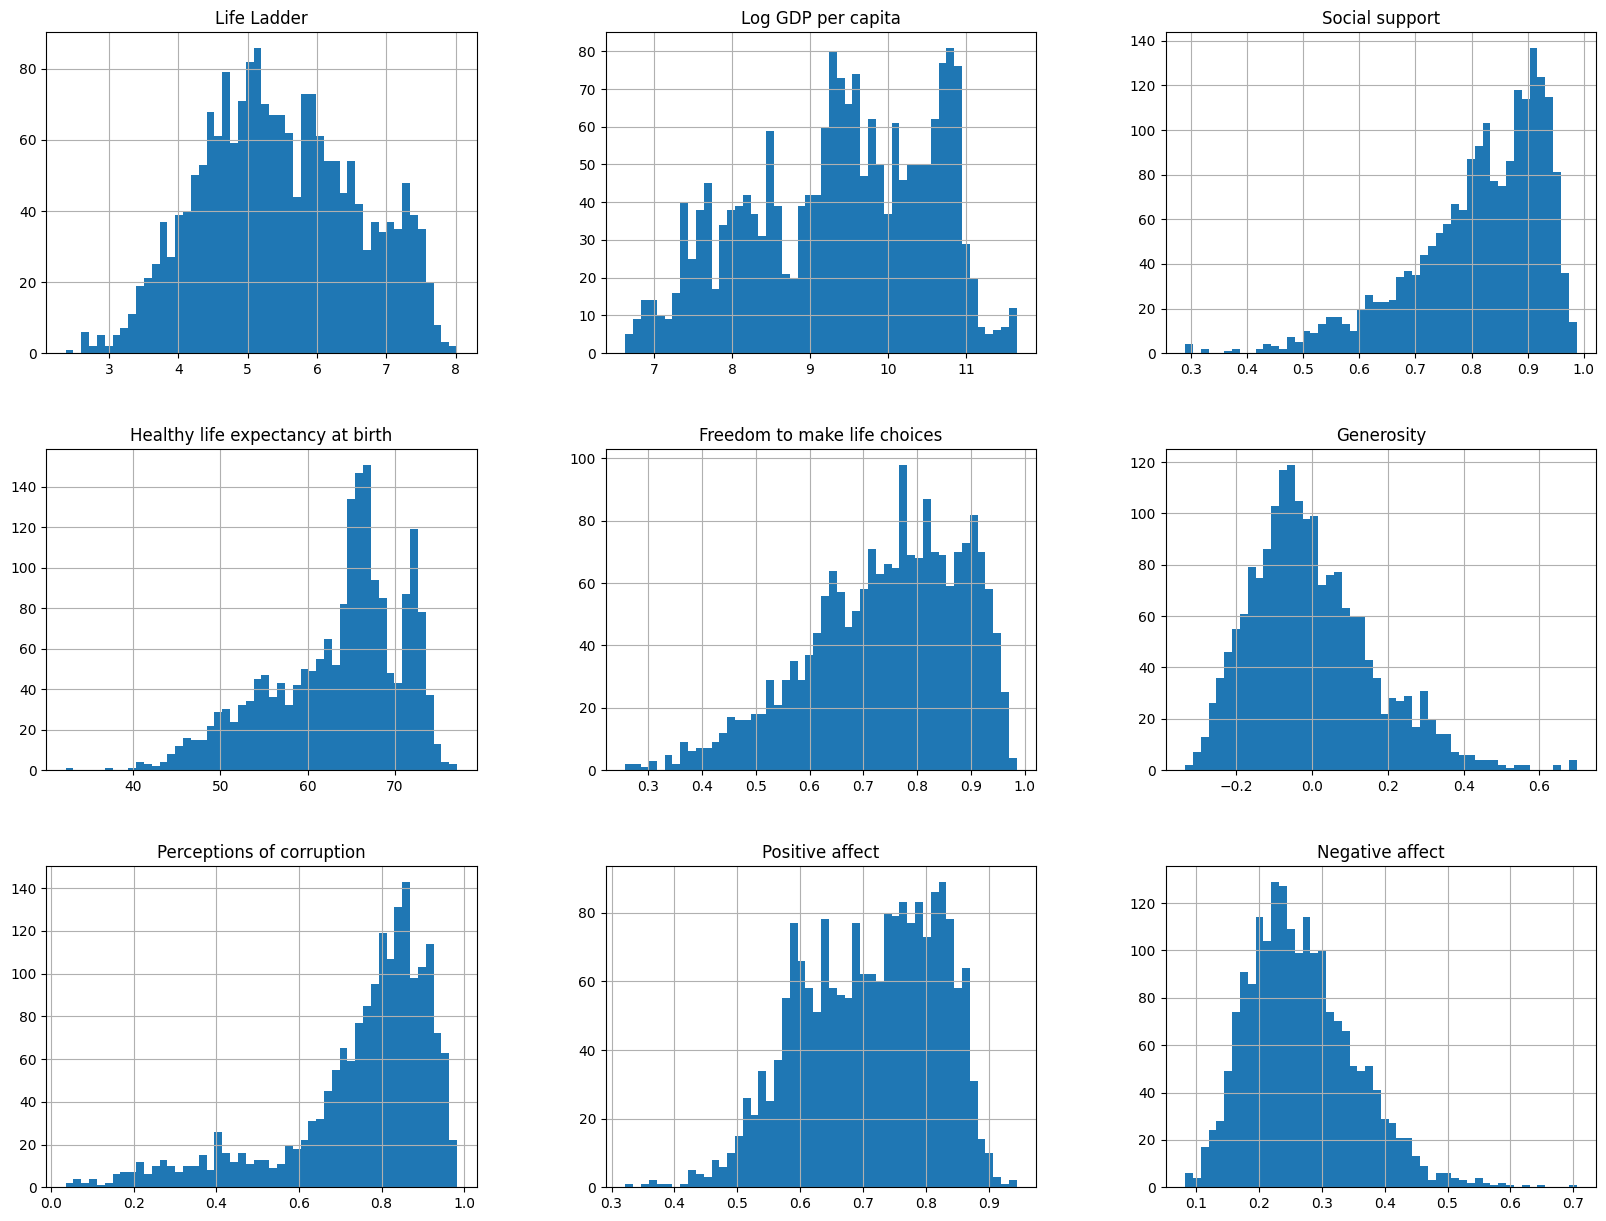

In [9]:
import matplotlib.pyplot as plt 
happiness.hist(bins=50, figsize=(20,15)) 
plt.show()

In [10]:
# Assuming 'df' is your DataFrame
numeric_columns = happiness.select_dtypes(include=['float'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr(method='pearson')

In [11]:
correlation_matrix["Life Ladder"].sort_values(ascending=False)

Life Ladder                         1.000000
Log GDP per capita                  0.790166
Healthy life expectancy at birth    0.744506
Social support                      0.707806
Positive affect                     0.532273
Freedom to make life choices        0.528063
Generosity                          0.190632
Negative affect                    -0.297488
Perceptions of corruption          -0.427245
Name: Life Ladder, dtype: float64

In [12]:
median = happiness["Log GDP per capita"].median()
happiness["Log GDP per capita"].fillna(median, inplace=True)

<Axes: >

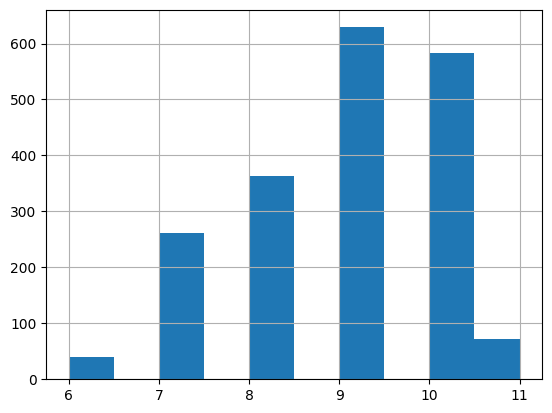

In [13]:
happiness["Log_GDP_per_capita_Category"] = pd.cut(happiness["Log GDP per capita"],
                                   bins=[6., 7., 8., 9.0, 10., 11., np.inf],labels=[6, 7, 8, 9, 10, 11])

happiness["Log_GDP_per_capita_Category"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(happiness, happiness["Log_GDP_per_capita_Category"]):
        strat_train_set = happiness.loc[train_index]
        strat_test_set = happiness.loc[test_index]

In [15]:
strat_test_set["Log_GDP_per_capita_Category"].value_counts() / len(strat_test_set)

Log_GDP_per_capita_Category
9     0.323077
10    0.300000
8     0.187179
7     0.133333
11    0.035897
6     0.020513
Name: count, dtype: float64

In [16]:
# Combine the dataframes horizontally (side by side) for comparision
compare_df = pd.concat([happiness['Log GDP per capita'], strat_train_set['Log GDP per capita'], strat_test_set['Log GDP per capita']], axis=1)

# Print the combined dataframe
print(compare_df.describe())

       Log GDP per capita  Log GDP per capita  Log GDP per capita
count         1949.000000         1559.000000          390.000000
mean             9.370144            9.370891            9.367156
std              1.143437            1.142699            1.147846
min              6.635000            6.635000            6.776000
25%              8.478000            8.483500            8.470750
50%              9.460000            9.460000            9.456500
75%             10.335000           10.333500           10.365000
max             11.648000           11.645000           11.648000


In [17]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("Log_GDP_per_capita_Category", axis=1, inplace=True)

In [18]:
happiness_train = strat_train_set.copy()
happiness_test = strat_test_set.copy()

In [19]:
# Assuming  is your DataFrame
numeric_columns = happiness_train.select_dtypes(include=['float'])  # Select only numeric columns
correlation_matrix_train = numeric_columns.corr(method='pearson')

correlation_matrix_train["Life Ladder"].sort_values(ascending=False)

Life Ladder                         1.000000
Log GDP per capita                  0.787437
Healthy life expectancy at birth    0.745050
Social support                      0.712383
Positive affect                     0.540011
Freedom to make life choices        0.539210
Generosity                          0.204413
Negative affect                    -0.304242
Perceptions of corruption          -0.437402
Name: Life Ladder, dtype: float64

array([[<Axes: xlabel='Life Ladder', ylabel='Life Ladder'>,
        <Axes: xlabel='Log GDP per capita', ylabel='Life Ladder'>,
        <Axes: xlabel='Healthy life expectancy at birth', ylabel='Life Ladder'>,
        <Axes: xlabel='Social support', ylabel='Life Ladder'>,
        <Axes: xlabel='Positive affect', ylabel='Life Ladder'>,
        <Axes: xlabel='Freedom to make life choices', ylabel='Life Ladder'>,
        <Axes: xlabel='Perceptions of corruption', ylabel='Life Ladder'>],
       [<Axes: xlabel='Life Ladder', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Log GDP per capita', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Healthy life expectancy at birth', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Social support', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Positive affect', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Freedom to make life choices', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Perceptions of corruption', ylabel='

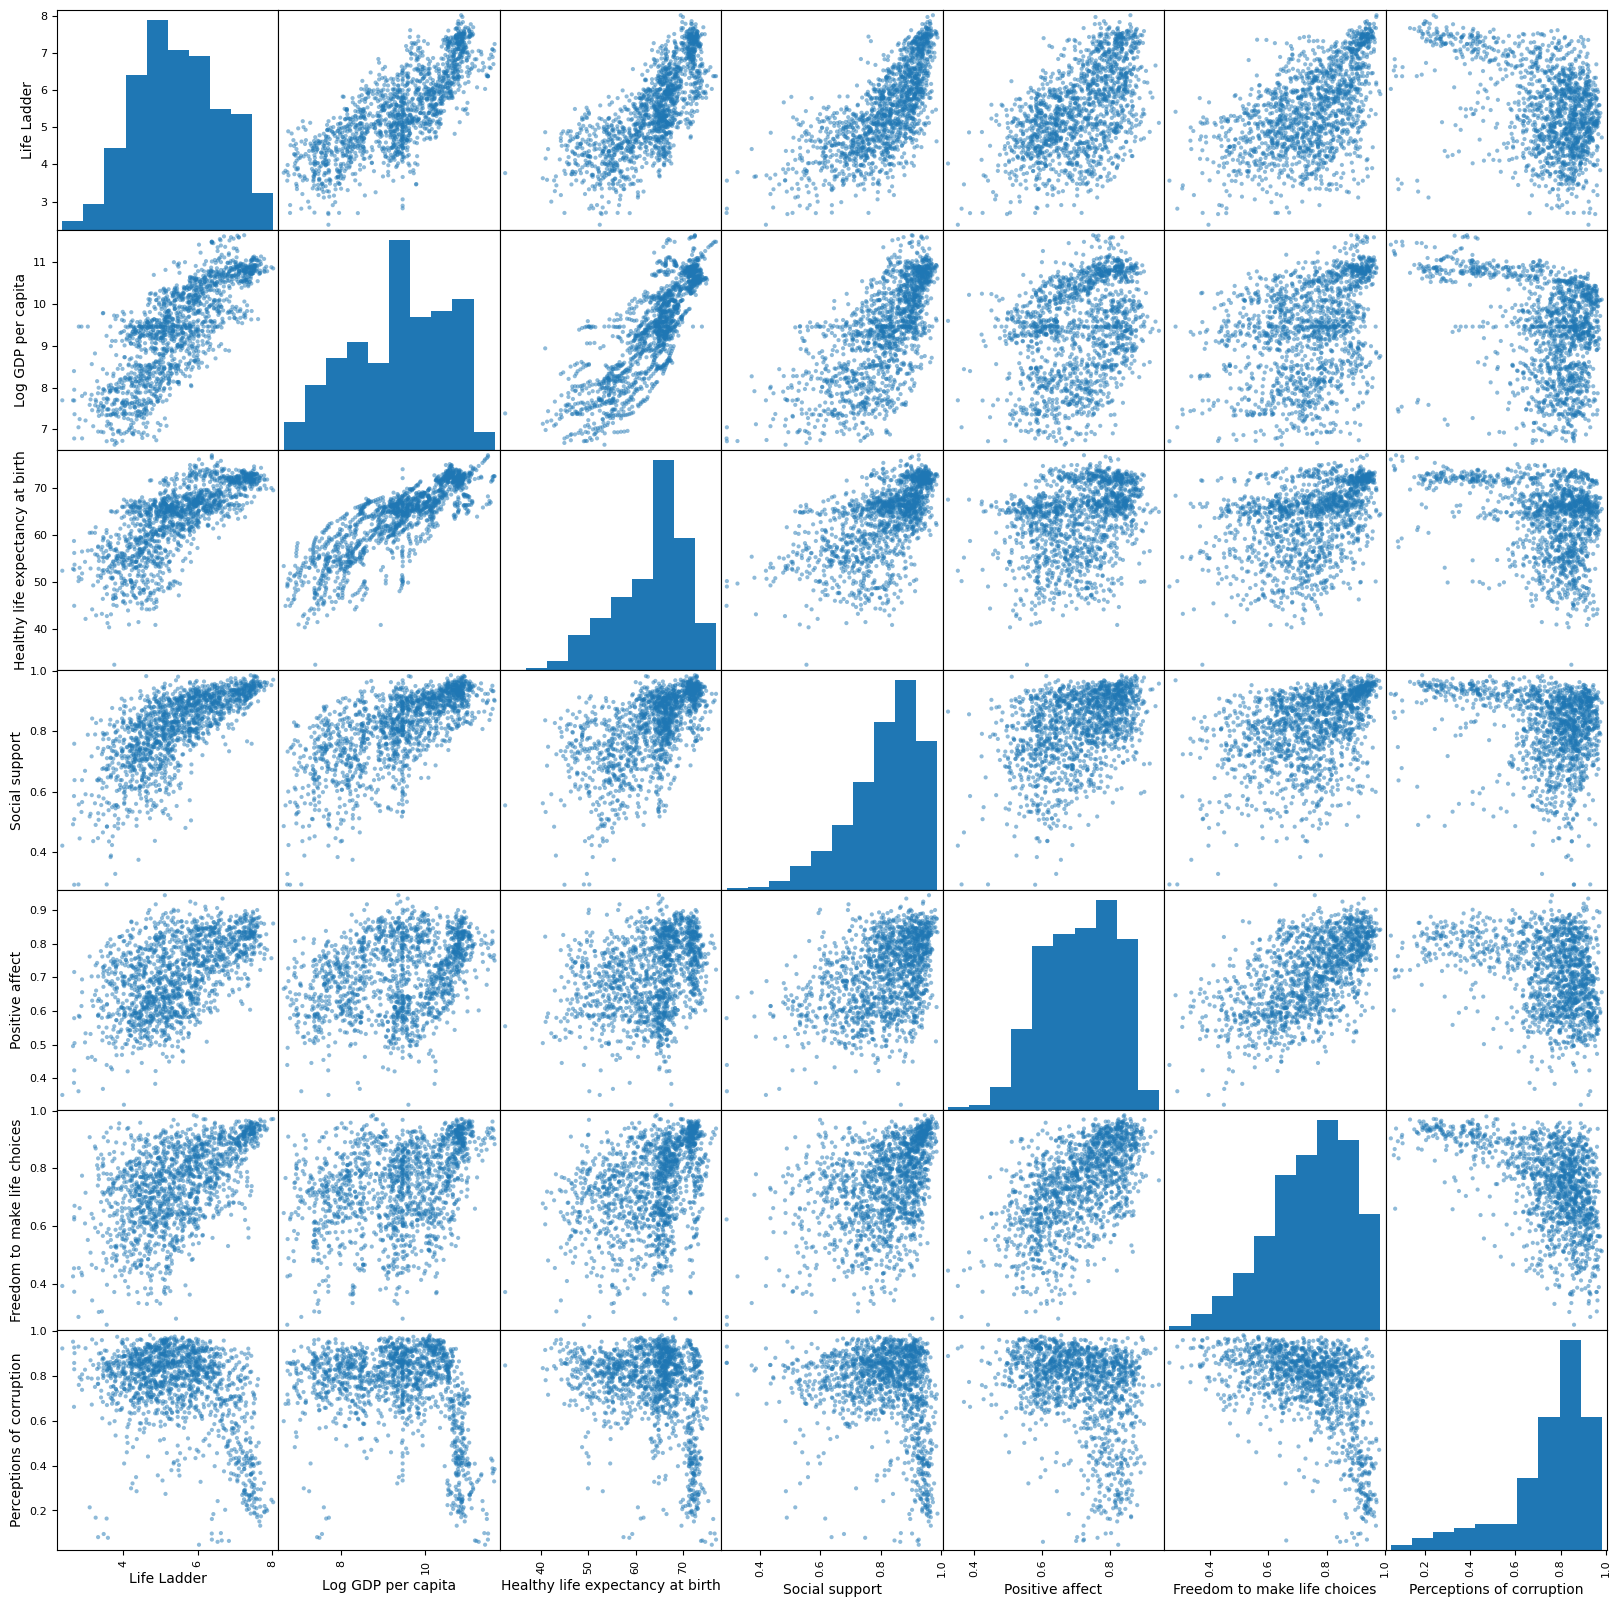

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth",
                  "Social support","Positive affect","Freedom to make life choices","Perceptions of corruption"]
scatter_matrix(happiness_train[attributes], figsize=(20, 20))

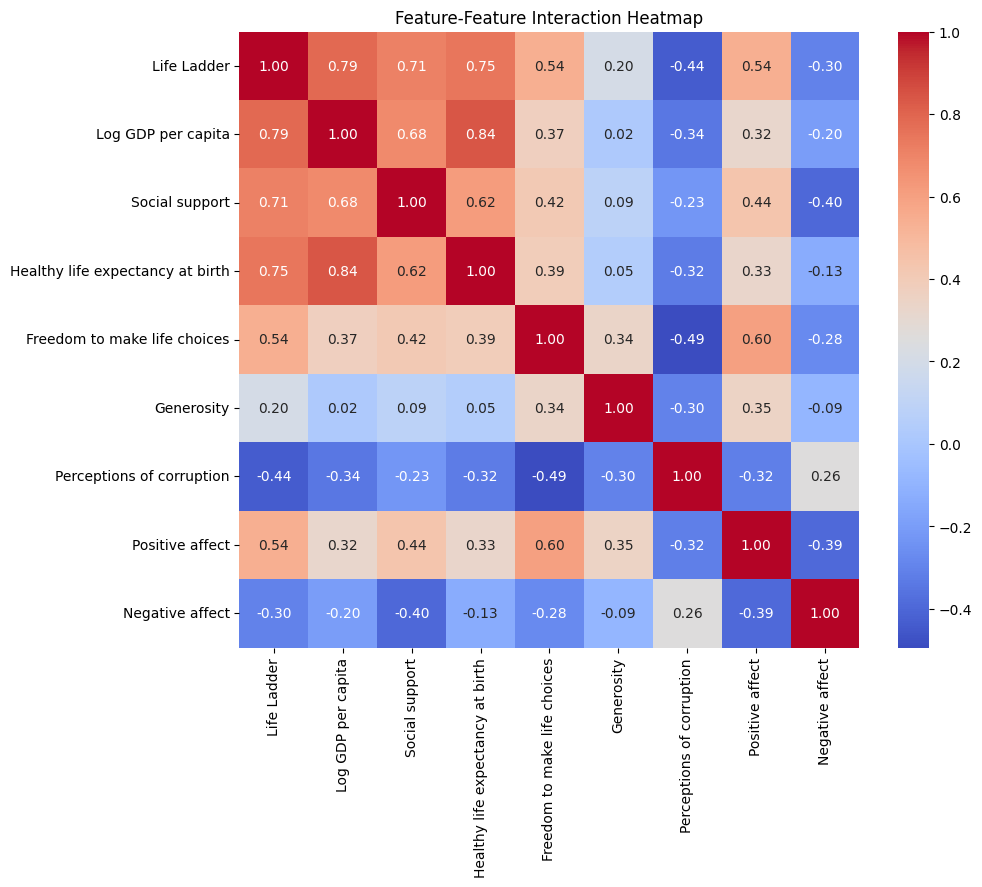

In [21]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature-Feature Interaction Heatmap')
plt.show()


In [22]:
happiness_train_features = strat_train_set.drop("Life Ladder", axis=1)
happiness_train_labels = strat_train_set["Life Ladder"].copy()

In [23]:
happiness_train_features_num = happiness_train_features.drop("Country name", axis=1)
happiness_train_features_cat = happiness_train_features[["Country name"]]

In [24]:
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler())
        ])

In [25]:
num_attribs = list(happiness_train_features_num)
cat_attribs = ["Country name"]

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])

happiness_train_prepared = full_pipeline.fit_transform(happiness_train_features)

In [26]:
# Assuming you have the transformed data in happiness_train_prepared
column_names = full_pipeline.named_transformers_['num'].get_feature_names_out(num_attribs)
column_names = list(column_names) + cat_attribs
print(column_names)

['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Country name']


In [ ]:
happiness_train_prepared = happiness_train_prepared  # Transformed training dataset
happiness_test_prepared = full_pipeline.transform(happiness_test)  # Transformed test dataset

In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(happiness_train_prepared, happiness_train_labels)

In [ ]:
happiness_test_labels = happiness_test["Life Ladder"].copy()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lin_reg.predict(happiness_test_prepared)

mse = mean_squared_error(happiness_test_labels, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(happiness_test_labels, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2):", r2)


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(happiness_train_prepared, happiness_train_labels)

In [ ]:
happiness_predictions = tree_reg.predict(happiness_test_prepared)
tree_mse = mean_squared_error(happiness_test_labels, happiness_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, happiness_train_prepared, happiness_train_labels,
                             scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)


In [ ]:
tree_rmse_scores

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, happiness_train_prepared, happiness_train_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, happiness_train_prepared, happiness_train_labels,scoring="accuracy", cv=10)
display_scores(lin_scores)